In [43]:
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt

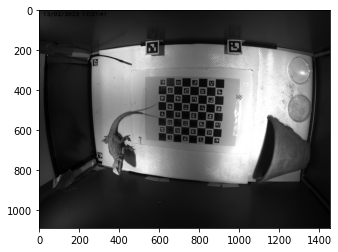

In [32]:
img = cv2.imread('../output/captures/charuco/20230213T173741_top.png')
plt.imshow(img)

In [ ]:
## 80 * 43

In [100]:
43/2.6

16.538461538461537

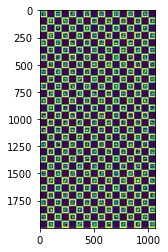

In [109]:
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_1000)
board = cv2.aruco.CharucoBoard_create(16, 30, 1.4, .8, aruco_dict)
imboard = board.draw((2000*16//30, 2000))
cv2.imwrite('/media/sil2/Data/regev/charuco_big.png', imboard)
plt.imshow(imboard)

In [30]:

# frame_markers = cv2.aruco.drawDetectedMarkers(img.copy(), corners, ids)
# plt.figure(figsize=(20, 15))
# plt.imshow(frame_markers, interpolation = "nearest")
# plt.show()
# sorted(ids)

In [40]:
with open('/data/Pogona_Pursuit/output/calibrations/calib_params_top_null.pkl', 'rb') as f:
    res = pickle.load(f)

camera_matrix = res['mtx']
dist_coeffs = res['dist']

In [74]:
ids

array([[31],
       [27],
       [23],
       [19],
       [15],
       [13],
       [11],
       [ 8],
       [ 7],
       [ 3],
       [ 2],
       [ 0],
       [30],
       [29],
       [28],
       [26],
       [25],
       [24],
       [22],
       [21],
       [20],
       [18],
       [17],
       [16],
       [14],
       [12],
       [10],
       [ 9],
       [ 6],
       [ 5],
       [ 4],
       [ 1],
       [ 0]], dtype=int32)

In [88]:
def filter_markers(crns, indices):
    crns_, indices_ = [], []
    for i, c in zip(indices, crns):
        if i in [0, 3, 5]:
            if cv2.contourArea(c) > 700 or c.squeeze()[0, 0] < 600:
                continue
        crns_.append(c)
        indices_.append(i)
    return crns_, np.array(indices_)

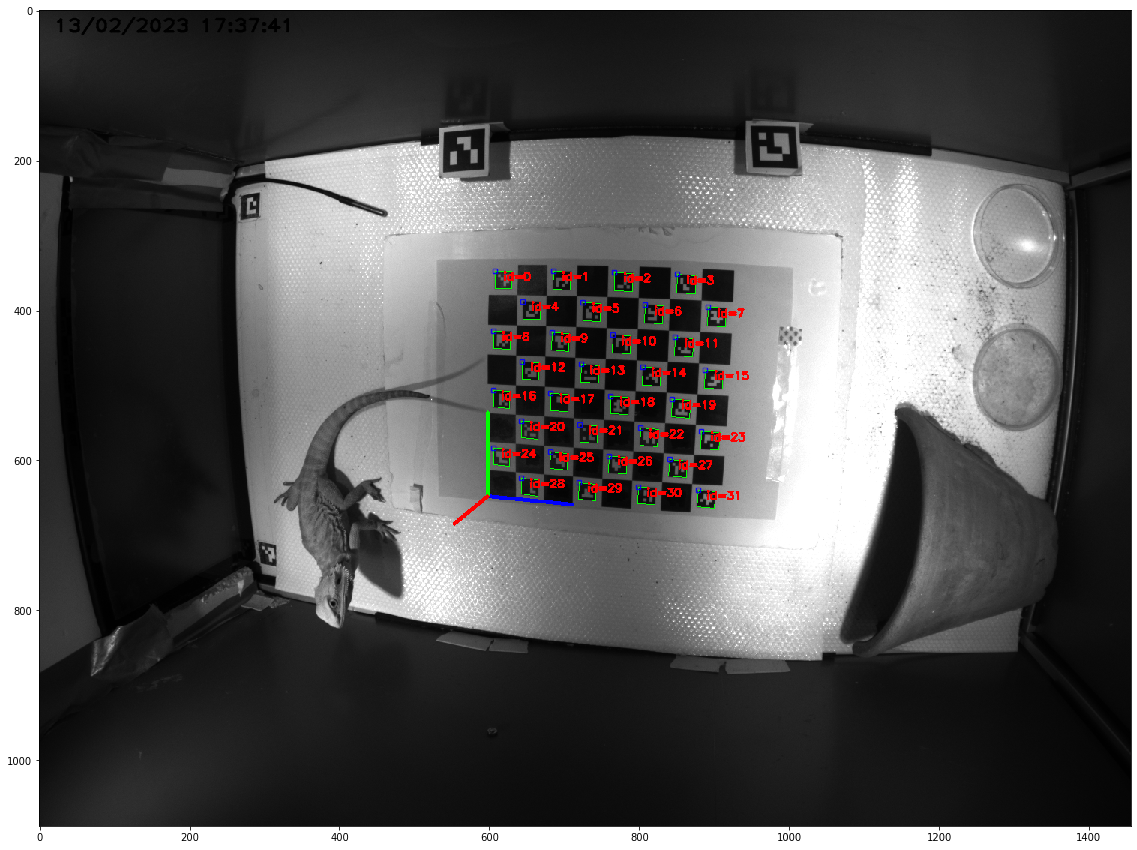

In [89]:
gray = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.00001)
corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, aruco_dict)
corners, ids = filter_markers(corners, ids)
if len(corners)>0:
    _, charuco_corners, charuco_ids = cv2.aruco.interpolateCornersCharuco(corners, ids, gray, board)
    # frame_markers = cv2.aruco.drawDetectedCornersCharuco(frame_markers, charuco_corners, charuco_ids, (0, 0, 255))
    retval, rvec, tvec = cv2.aruco.estimatePoseCharucoBoard(charuco_corners, charuco_ids, board, camera_matrix, dist_coeffs,
                                                            None, None)
    frame_markers = cv2.aruco.drawDetectedMarkers(img.copy(), corners, ids)
    if retval:
         frame_markers = cv2.aruco.drawAxis(frame_markers, camera_matrix, dist_coeffs, rvec, tvec, 3)
    plt.figure(figsize=(20, 15))
    plt.imshow(frame_markers, interpolation = "nearest")
    plt.show()

In [69]:
zip(corners, ids)

In [54]:
print(cv2.RQDecomp3x3(cv2.Rodrigues(rvec)[0])[0])

(-163.9418438095452, -22.23992068509273, 0.4697094703064225)


In [26]:
corners

[array([[[878.3358 , 639.8867 ],
         [902.1783 , 641.36786],
         [900.30133, 663.5542 ],
         [876.62225, 662.4133 ]]], dtype=float32),
 array([[[840.4332 , 599.0931 ],
         [864.4827 , 600.5726 ],
         [863.0918 , 623.41833],
         [839.2575 , 622.1183 ]]], dtype=float32),
 array([[[883.3948 , 561.34467],
         [907.69415, 562.72723],
         [906.16425, 586.3241 ],
         [881.88635, 585.2416 ]]], dtype=float32),
 array([[[844.3426 , 518.52576],
         [869.1139 , 519.90393],
         [867.6727 , 544.0564 ],
         [843.2614 , 542.7189 ]]], dtype=float32),
 array([[[887.641  , 479.60394],
         [912.42914, 480.7684 ],
         [911.20087, 505.34445],
         [886.5512 , 504.35303]]], dtype=float32),
 array([[[722.6676 , 472.04892],
         [746.86774, 473.1063 ],
         [746.2793 , 497.4435 ],
         [722.2977 , 496.24146]]], dtype=float32),
 array([[[847.6583 , 435.99442],
         [872.72595, 437.29187],
         [871.6051 , 462.072  ],
 